In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats
import geopandas as gpd
%matplotlib inline
from IPython.display import Markdown
from functools import reduce

In [85]:
dataframe = pd.read_csv("data/RV_O_010_L_OK_SK.CSV", sep=';')
dataframe.head()

,Kód okresu,Názov okresu,Pohlavie,Ekonomické vekové skupiny,Vzdelanie,abs.
0,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),dôverné,1
1,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),nezistené,56
2,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),základné vzdelanie - 1. stupeň základnej školy,835
3,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),základné vzdelanie - 2. stupeň základnej školy,2
4,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),bez ukončeného vzdelania – osoby vo veku 0-14 ...,2671


In [97]:
url = "https://bbrejova.github.io/viz/data/districts.json"
districts = gpd.read_file(url)

In [87]:
merged = districts.merge(dataframe, right_on='Kód okresu', left_on='LAU1_CODE')
merged.info()
merged['abs.'].sum()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   LAU1                       7017 non-null   object             
 1   DOW                        7017 non-null   datetime64[ns, UTC]
 2   IDN3                       7017 non-null   int64              
 3   NM3                        7017 non-null   object             
 4   IDN2                       7017 non-null   int64              
 5   NM2                        7017 non-null   object             
 6   NUTS2                      7017 non-null   object             
 7   NUTS2_CODE                 7017 non-null   object             
 8   NUTS3                      7017 non-null   object             
 9   NUTS3_CODE                 7017 non-null   object             
 10  LAU1_CODE                  7017 non-null   object             
 

5449270

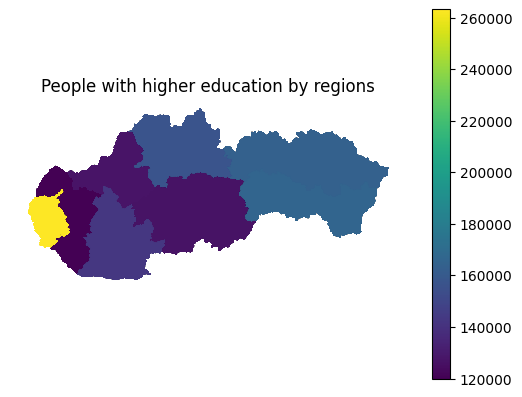

In [111]:
picked_edu = merged['Vzdelanie'].str.startswith('vysokoškolské') | merged['Vzdelanie'].str.startswith('vyššie')
by_education = merged[picked_edu]
by_education = by_education.groupby('NUTS3_CODE')['abs.'].sum().reset_index().rename(columns={'abs.': 'picked_edu'})
merged2: pd.DataFrame = merged.merge(by_education, on='NUTS3_CODE')
ax = merged2.plot(legend=True, column='picked_edu', ax=None)
plt.title('People with higher education by regions')
plt.axis('off')
plt.show()